In [93]:
from data_handler import DataHandler
from linear_regression import LinearRegression
# from log_regression import LogisticalRegression
from calculations import Calculations

import numpy as np
import matplotlib.pyplot as plt

ITERATIONS = 10000
tr_log_loss = np.array(0)
val_log_loss = np.array(0)

TERMINATION_VALUE = 2**-16
LEARNING_RATE = 0.0005

In [2]:
calculator = Calculations()
dh = DataHandler("spambase.data")
data = dh.parse_data_no_header()
data = dh.shuffle_data(data)
data_train, data_validation = dh.split_data(data)
data_train, data_validation

(array([[1.000e-01, 2.000e-01, 1.010e+00, ..., 6.690e+02, 1.351e+03,
         1.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 4.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 1.500e+01,
         0.000e+00],
        ...,
        [8.900e-01, 0.000e+00, 0.000e+00, ..., 9.000e+00, 7.600e+01,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.100e+01, 4.300e+01,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.500e+01, 5.000e+01,
         0.000e+00]], dtype=float32),
 array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+01, 9.700e+01,
         0.000e+00],
        [0.000e+00, 0.000e+00, 1.100e+00, ..., 7.900e+01, 3.160e+02,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 1.600e+01,
         0.000e+00],
        ...,
        [4.300e-01, 4.000e-01, 3.700e-01, ..., 1.780e+02, 3.303e+03,
         1.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.200e+01,

In [3]:
training_data_x, training_data_y_1 = dh.getXY(
            data_train, -1, -1)
training_data_y = training_data_y_1.reshape((1, training_data_x.shape[0]))
mean, std = dh.zscores(training_data_x)
training_data_x = dh.zscore_data(mean, std, training_data_x)

sample_size, feature_size = training_data_x.shape

training_data_x.shape, training_data_y.shape, sample_size, feature_size

((3067, 57), (1, 3067), 3067, 57)

In [4]:
validation_data_x, validation_data_y = dh.getXY(
            data_validation, -1, -1)
validation_data_y = validation_data_y.reshape((1, validation_data_x.shape[0]))
validation_data_x = dh.zscore_data(mean, std, validation_data_x)
validation_data_x.shape, validation_data_y.shape

((1533, 57), (1, 1533))

In [84]:
# Confidence Level: High
def compute_log_loss(dY, p):
    logP = np.log(p, where=(p>0))
    logP_min = np.log((1.0 - p), where=((1-p)>0))
    cost = -(np.dot(dY, logP)+np.dot((1-dY), logP_min))

    return cost

def prediction(w, x, b):
    # Y_preds - Ouput size = prediction for each sample
    P_ = sigmoid(wx_b(w, x, b))
    print(P_)
    Y_preds = np.zeros((sample_size, 1))
    for k in range(sample_size-1):
        if P_[k] > 0.5:
            Y_preds[0, k] = 1
        else:
            Y_preds[0, k] = 0
    return Y_preds, P_

## Also interpreted as Y_hat
def sigmoid(fxn):
    return (1/(1+(np.exp(-fxn))))

def wx_b(w, X, b):
    return np.matmul(X, w.T) + b

# Confidence Level: Medium
def compute_weights(X, Y, Y_):
    diff = np.subtract(Y_, Y.T)
    dW = np.dot(X.T, diff) / sample_size
    return dW

def compute_bias(Y_hat, Y):
    return np.sum(np.subtract(Y_hat, Y.T))/sample_size

def train_model(w, b, tX, tY, vX, vY):
    Z = wx_b(w,tX,b)
    # print(Z)
    tP = sigmoid(Z)
    
    dw = compute_weights(tX, tY, tP)
    db = compute_bias(tP, tY)
    
    t_cost = compute_log_loss(tY, tP)
    
    vP = sigmoid(wx_b(w,vX,b))

    v_cost = compute_log_loss(vY, vP)

    losses = {
        "TR": t_cost,
        "VAL": v_cost
    }
    return dw, db, losses

In [95]:
# %%time
tr_costs = []
val_costs = []
tX = training_data_x
tY = training_data_y.reshape(sample_size)
vX = validation_data_x
vY = validation_data_y
w = np.zeros(feature_size) # Shape -> weight for each feature of data
b = 0
#Log Regression Calculation
for i in range(ITERATIONS):
    # Returns in order:
    ## Gradient Descent Weight
    ## Gradient Descent Bias
    ## Gradient Descent Probabilities/Y_hat
    dw, db, losses = train_model(w, b, tX, tY, vX, vY)

    # Updating the parameters.
    # print(dw.shape)
    # assert(dw.shape == w.shape)
    w = w - LEARNING_RATE * dw
    b = b - LEARNING_RATE * db
    
    tr_costs.append(losses["TR"])
    val_costs.append(losses["VAL"])

    # Print costs when changed
    if i % 100 == 0:
        print("Training Mean Cost after iteration %i: %f" % (i, np.mean(tr_costs)))
        print("Validation Mean Cost after iteration %i: %f" % (i, np.mean(val_costs)))
        # print("Weight after iteration %i: " % (i), (w))
        # print("Bias after iteration %i: %f" % (i, b))

    if np.mean(val_costs) < TERMINATION_VALUE:
        print("Termination Condition Hit, Exiting {}".format(np.mean(val_costs)))
        break;

Training Mean Cost after iteration 0: 2125.882403
Validation Mean Cost after iteration 0: 1062.594628
Training Mean Cost after iteration 100: 2109.555209
Validation Mean Cost after iteration 100: 1055.548192
Training Mean Cost after iteration 200: 2100.319324
Validation Mean Cost after iteration 200: 1051.525381
Training Mean Cost after iteration 300: 2094.035417
Validation Mean Cost after iteration 300: 1048.700028
Training Mean Cost after iteration 400: 2089.237174
Validation Mean Cost after iteration 400: 1046.471668
Training Mean Cost after iteration 500: 2085.279689
Validation Mean Cost after iteration 500: 1044.580677
Training Mean Cost after iteration 600: 2081.839927
Validation Mean Cost after iteration 600: 1042.897766
Training Mean Cost after iteration 700: 2078.741371
Validation Mean Cost after iteration 700: 1041.352542
Training Mean Cost after iteration 800: 2075.881061
Validation Mean Cost after iteration 800: 1039.904081
Training Mean Cost after iteration 900: 2073.19569

[0.94021104 0.37152528 0.37718069 ... 0.38985588 0.38683336 0.39113083]
Training Accuracy 55.60287302323401 %
[0.39375747 0.48985209 0.37445763 ... 0.90395761 0.39908381 0.37655098]
Validation Accuracy 55.73419451370912 %


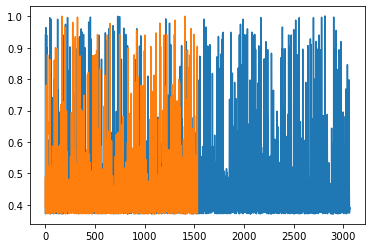

In [96]:
tP_ = sigmoid(wx_b(w, tX, b))

# train_Y_preds, P = prediction(w, tX, b)
print(tP_)
plt.plot(tP_)
train_acc = calculator.accuracy(tY, tP_)
print("Training Accuracy {} %".format(train_acc))

vP_ = sigmoid(wx_b(w, vX, b))

print(vP_)
plt.plot(vP_)
val_acc = calculator.accuracy(vY, vP_)
print("Validation Accuracy {} %".format(val_acc))

In [ ]:
tr_costs = np.squeeze(tr_costs)
val_costs = np.squeeze(val_costs)

In [ ]:
plt.plot(tr_costs)
plt.title("Log Regression Costs")

plt.ylabel("cost")
plt.xlabel("iterations")

In [ ]:
plt.plot(val_costs)
plt.title("Log Regression Costs")

plt.ylabel("cost")
plt.xlabel("iterations")